In [1]:
# Import necessary libraries to work with

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing training and test csv files into Pandas dataframes

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Data Exploration

In [3]:
# Get an idea on training data by exploring the first 5 samples

train_df.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


## Data Description

* <b>Artist Name</b> : Name of artist or artists who made the track.
* <b>Track Name</b> : Song's name.
* <b>Popularity</b> : The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
* <b>danceability</b> : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* <b>energy</b> : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* <b>key</b> : The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C#/Db, 2 = D and so on.
* <b>loudness</b> : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 dB.
* <b>mode</b> : Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. Major mode has a bright and happy sound, while minor mode has a darker and sadder sound.
* <b>speechiness</b> : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* <b>acousticness</b> : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* <b>instrumentalness</b> : Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* <b>liveness</b> : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* <b>valence</b> : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g sad, depressed, angry).
* <b>tempo</b> : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* <b>duration_in min/ms</b> : Duration of a given track whether in minutes or milliseconds.
* <b>time_signature</b> : A written indicator that shows the number of beats per measure and the type of note that carries the beat in a piece of music.
* <b>Class</b> : Track's genre.

In [4]:
# Get the number of rows and columns of training data

train_df.shape

(14396, 18)

In [5]:
# Extract training data's list of column names

train_df.columns

Index(['Id', 'Artist Name', 'Track Name', 'Popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

In [6]:
# Explore the datatype of every variable of the training data

train_df.dtypes

Id                      int64
Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object

In [7]:
# Calculate the number of null values of every variable in the training dataset

train_df.isna().sum()

Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [8]:
# Gather more information on the training dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [9]:
# Get a statistical description on all variables of the training data

train_df.describe(include='all')

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14396,14396,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
unique,NaN,7913,12455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Backstreet Boys,Fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,58,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7198.500000,NaN,NaN,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,NaN,NaN,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,NaN,NaN,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,NaN,NaN,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,NaN,NaN,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,NaN,NaN,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000


## Duplicates

In [10]:
# Get the list of records that have the same artist & track name

train_df[train_df[['Artist Name', 'Track Name']].duplicated()]

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
600,601,The Chats,Drunk n Disorderly,47.0,0.509,0.733,9.0,-5.909,1,0.1260,0.016500,NaN,0.4040,0.676,109.736,75760.0,4,6
614,615,Wallice,Punching Bag,52.0,0.621,0.766,1.0,-1.730,0,0.0392,0.433000,0.000009,0.3230,0.612,138.974,153784.0,4,9
671,672,Alice Cooper,School's Out,68.0,0.294,0.745,5.0,-9.138,1,0.0461,0.050000,0.125000,0.6760,0.347,134.364,210107.0,4,10
709,710,Foals,My Number,68.0,0.639,0.715,6.0,-8.954,0,0.0392,0.024300,0.000552,0.6190,0.813,128.072,238853.0,4,10
862,863,Freeds,Fruit Bats,42.0,0.897,0.466,10.0,-10.180,1,0.0478,0.556000,0.000165,0.1190,0.522,104.944,175313.0,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14377,14378,Resolve,Seasick Sailor,43.0,0.468,0.964,1.0,-5.384,0,0.0931,0.009140,0.000014,0.3500,0.185,95.035,219185.0,4,8
14379,14380,POORSTACY,Public Enemy,NaN,0.520,0.967,3.0,-3.837,0,0.4890,0.002480,0.000003,0.3280,0.477,179.924,149500.0,4,1
14381,14382,Ozzy Osbourne,"Mama, I'm Coming Home",69.0,0.282,0.656,8.0,-6.557,1,0.0302,0.010500,NaN,0.0892,0.242,139.352,251867.0,4,10
14384,14385,Jackie Hayes,eye 2 eye,48.0,0.638,0.666,4.0,-6.951,0,0.0392,0.007840,0.000067,0.3140,0.651,131.962,185455.0,4,6


In [11]:
# Get the list of songs that have duplicated track names

train_df[train_df[['Track Name']].duplicated()]

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
466,467,The Game,Dreams,58.0,0.630,0.780,6.0,-5.353,1,0.2210,0.004990,NaN,0.2060,0.281,155.779,286453.0,4,5
600,601,The Chats,Drunk n Disorderly,47.0,0.509,0.733,9.0,-5.909,1,0.1260,0.016500,NaN,0.4040,0.676,109.736,75760.0,4,6
614,615,Wallice,Punching Bag,52.0,0.621,0.766,1.0,-1.730,0,0.0392,0.433000,0.000009,0.3230,0.612,138.974,153784.0,4,9
643,644,Foghat,My Babe,NaN,0.383,0.803,7.0,-9.353,1,0.0709,0.086100,0.018600,0.1710,0.618,143.188,276760.0,4,2
665,666,La Roux,Bulletproof,72.0,0.674,0.882,3.0,-2.771,0,0.0477,0.000441,0.000065,0.0680,0.682,123.016,205733.0,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14377,14378,Resolve,Seasick Sailor,43.0,0.468,0.964,1.0,-5.384,0,0.0931,0.009140,0.000014,0.3500,0.185,95.035,219185.0,4,8
14379,14380,POORSTACY,Public Enemy,NaN,0.520,0.967,3.0,-3.837,0,0.4890,0.002480,0.000003,0.3280,0.477,179.924,149500.0,4,1
14381,14382,Ozzy Osbourne,"Mama, I'm Coming Home",69.0,0.282,0.656,8.0,-6.557,1,0.0302,0.010500,NaN,0.0892,0.242,139.352,251867.0,4,10
14384,14385,Jackie Hayes,eye 2 eye,48.0,0.638,0.666,4.0,-6.951,0,0.0392,0.007840,0.000067,0.3140,0.651,131.962,185455.0,4,6


In [12]:
# Take a look at some records that have the same artist and track name

train_df[train_df['Track Name'] == 'Drunk n Disorderly']

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
592,593,The Chats,Drunk n Disorderly,47.0,0.509,0.733,9.0,-5.909,1,0.126,0.0165,NaN,0.404,0.676,109.736,75760.0,4,10
600,601,The Chats,Drunk n Disorderly,47.0,0.509,0.733,9.0,-5.909,1,0.126,0.0165,NaN,0.404,0.676,109.736,75760.0,4,6
3947,3948,The Chats,Drunk n Disorderly,47.0,0.509,0.733,9.0,-5.909,1,0.126,0.0165,NaN,0.404,0.676,109.736,75760.0,4,1


In [13]:
# Take a look at some records that have only the same track name and not necesserily the same artist name

train_df[train_df['Track Name'] == 'Dreams']

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
191,192,Irish Women In Harmony,Dreams,48.0,0.558,0.475,4.0,-8.623,1,0.0282,0.51600,0.000006,0.1070,0.344,116.924,4.150167,4,0
466,467,The Game,Dreams,58.0,0.630,0.780,6.0,-5.353,1,0.2210,0.00499,NaN,0.2060,0.281,155.779,286453.000000,4,5
5703,5704,Fleetwood Mac,Dreams,85.0,0.828,0.492,NaN,-9.744,1,0.0276,0.06440,0.004280,0.1280,0.789,120.151,257800.000000,4,10
7842,7843,chloe moriondo,Dreams,57.0,0.812,0.472,NaN,-9.649,1,0.0388,0.46800,0.000037,0.1030,0.603,119.970,215844.000000,4,6
10301,10302,Van Halen,Dreams,60.0,0.455,0.758,NaN,-11.361,1,0.0454,0.22300,0.000003,0.0986,0.540,141.304,294000.000000,4,10
13840,13841,Langston Hughes,Dreams,8.0,0.745,0.102,2.0,-19.061,1,0.9370,0.98200,NaN,0.1240,0.371,88.247,57443.000000,4,5


In [14]:
# Get the list of songs that have duplicated artist & track name and class, because we noticed that our data is multi-labeled

train_df[train_df[['Artist Name', 'Track Name', 'Class']].duplicated()]

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
1597,1598,The Rolling Stones,Beast Of Burden - Remastered,13.0,0.786,0.870,1.0,-3.875,0,0.0316,0.413000,0.000494,0.0389,0.864,100.660,4.419550,4,10
3068,3069,Sleepy Hallow,2055,82.0,0.829,0.512,6.0,-5.865,0,0.1870,0.492000,NaN,0.1200,0.638,80.511,2.066450,4,9
3299,3300,The Byrds,Turn! Turn! Turn! (To Everything There Is a Se...,66.0,0.451,0.818,2.0,-8.124,1,0.0439,0.135000,0.000029,0.0520,0.755,124.532,3.822667,4,10
3470,3471,Creedence Clearwater Revival,Fortunate Son,82.0,0.640,0.663,NaN,-7.516,1,0.0374,0.201000,0.008060,0.1520,0.663,132.770,140773.000000,4,10
4067,4068,The Backyardigans,Castaways,73.0,0.756,0.211,5.0,-17.646,1,0.4090,0.784000,0.000009,0.1100,0.307,81.253,87707.000000,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13771,13772,Creedence Clearwater Revival,Have You Ever Seen The Rain,78.0,0.741,0.697,NaN,-7.028,1,0.0277,0.066400,0.000023,0.1330,0.774,116.109,160133.000000,4,10
13994,13995,Jefferson Airplane,Somebody to Love,71.0,0.504,0.578,4.0,-9.302,1,0.0310,0.408000,NaN,0.3210,0.654,132.411,2.914000,4,10
14056,14057,The Animals,House Of The Rising Sun,62.0,0.315,0.534,9.0,-7.552,0,0.0310,0.000825,0.108000,0.1010,0.283,116.891,4.495333,3,10
14204,14205,Survivor,Eye of the Tiger,73.0,0.815,0.438,NaN,-14.522,0,0.0346,0.216000,0.000466,0.0787,0.552,108.965,4.062883,4,10


In [15]:
# Take a look at some samples that have the same artist & track name and class

train_df[train_df['Track Name'] == 'Beast Of Burden - Remastered']

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
1572,1573,The Rolling Stones,Beast Of Burden - Remastered,74.0,0.783,0.878,1.0,-3.864,0,0.0308,0.390,0.000778,0.0426,0.885,100.626,265173.00000,4,10
1597,1598,The Rolling Stones,Beast Of Burden - Remastered,13.0,0.786,0.870,1.0,-3.875,0,0.0316,0.413,0.000494,0.0389,0.864,100.660,4.41955,4,10


In [16]:
# Get the list of duplicated records upon all variables except Id

train_df[train_df.drop('Id', axis=1).duplicated()]

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class


# EDA

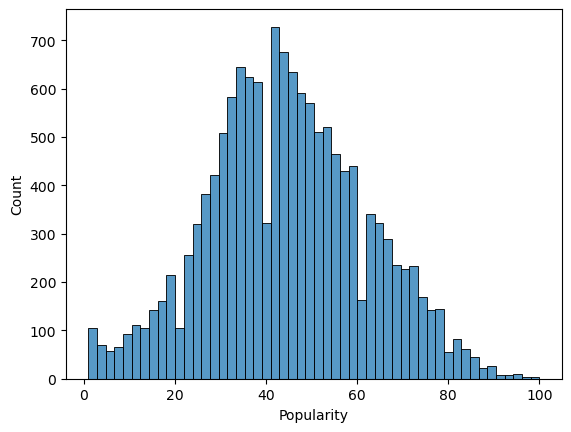

In [17]:
# Visualize the distribution of Popularity variable

sns.histplot(data=train_df, x='Popularity')
plt.show()

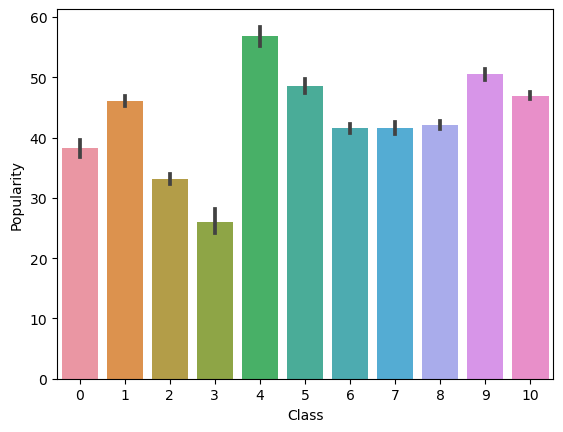

In [18]:
# Search if there is a relationship between Popularity & Class

sns.barplot(data=train_df, x='Class', y='Popularity')
plt.show()

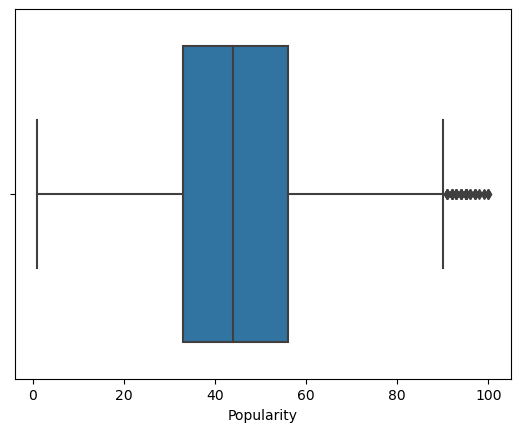

In [19]:
# Make a boxplot for Popularity to see whether there are outliers or not

sns.boxplot(data=train_df, x='Popularity')
plt.show()

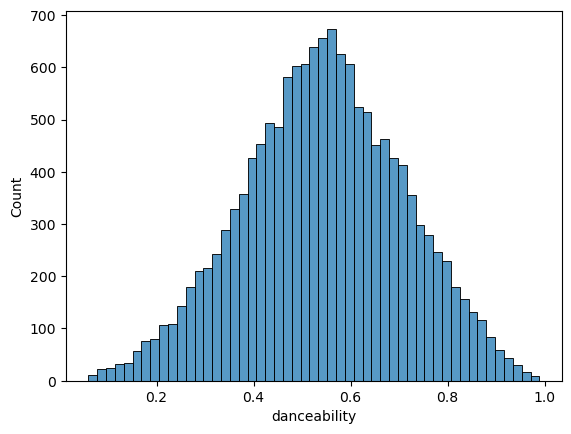

In [20]:
# Visualize the distribution of danceability

sns.histplot(data=train_df, x='danceability')
plt.show()

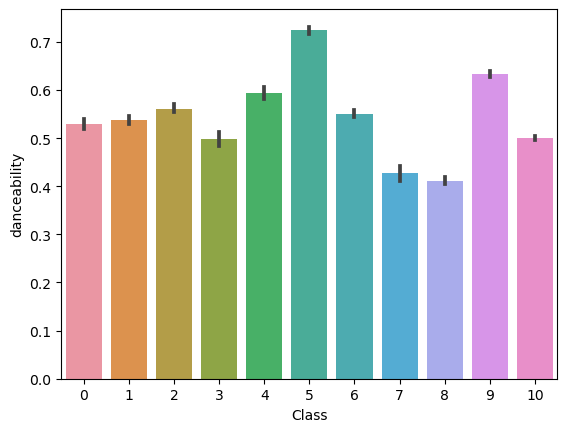

In [21]:
# Explore the relationship between danceability & Class

sns.barplot(data=train_df, x='Class', y='danceability')
plt.show()

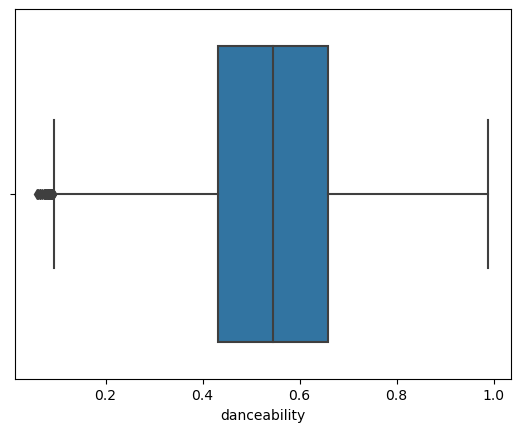

In [22]:
# Make a boxplot for danceability to see if there are outliers or not

sns.boxplot(data=train_df, x='danceability')
plt.show()

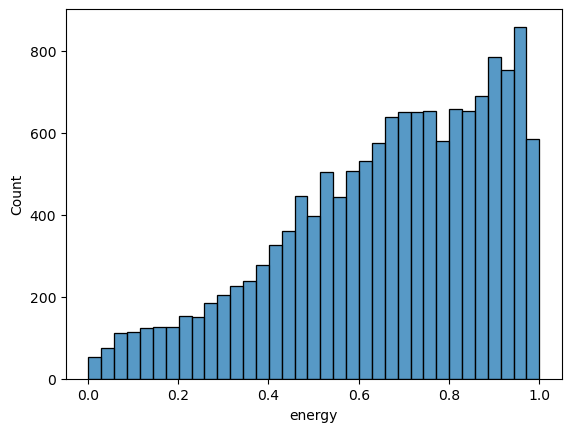

In [23]:
# Visualize the distribution of energy

sns.histplot(data=train_df, x='energy')
plt.show()

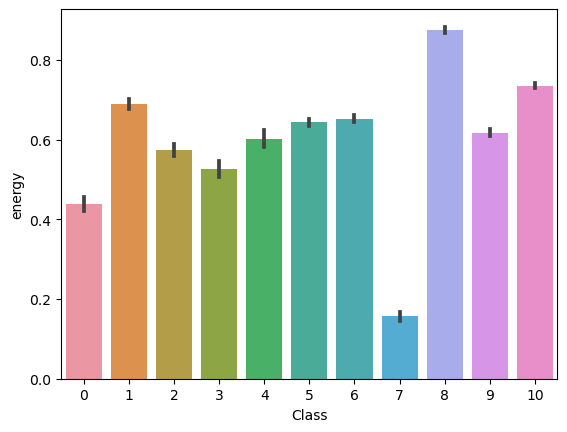

In [24]:
# Explore the relationship between energy & Class

sns.barplot(data=train_df, x='Class', y='energy')
plt.show()

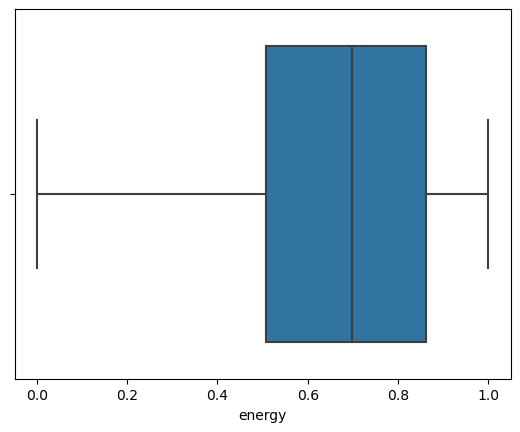

In [25]:
# Make a boxplot for energy to see if there are some outliers or not

sns.boxplot(data=train_df, x='energy')
plt.show()

In [26]:
# As key is a categorical variable, we calculate the number of samples for every category

train_df['key'].value_counts()

7.0     1650
9.0     1590
2.0     1582
1.0     1351
4.0     1252
11.0    1176
5.0     1115
6.0      963
8.0      872
10.0     825
3.0      411
Name: key, dtype: int64

In [27]:
# Explore the relationship between key & Class by making a crosstab between both variables

pd.crosstab(train_df['Class'], train_df['key'])

key,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
Class,,,,,,,,,,,
0,43,67,19,42,47,29,60,24,46,27,43
1,93,129,29,94,71,83,138,64,127,75,74
2,46,113,31,87,99,43,134,58,132,50,69
3,23,35,25,26,40,25,41,26,31,8,15
4,19,34,14,32,26,21,36,19,35,21,18
5,207,81,26,70,82,106,106,80,87,99,129
6,184,204,56,172,158,159,228,105,259,131,179
7,20,64,21,32,66,9,58,26,50,31,11
8,181,157,41,136,102,112,170,112,143,76,125


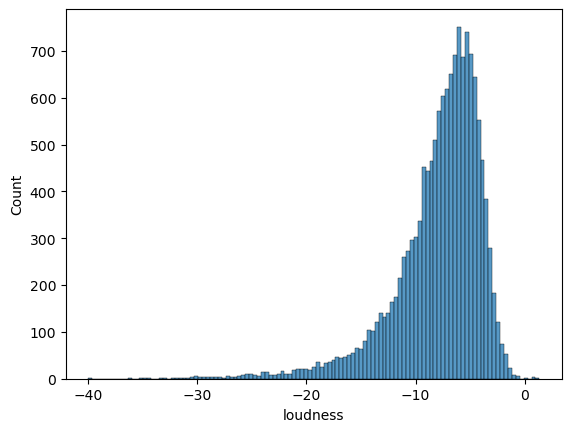

In [28]:
# Visualize the distribution of loudness

sns.histplot(data=train_df, x='loudness')
plt.show()

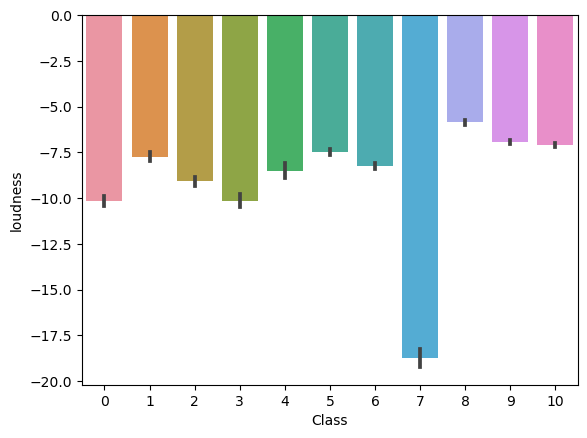

In [29]:
# Explore the relationship between loudness & Class

sns.barplot(data=train_df, x='Class', y='loudness')
plt.show()

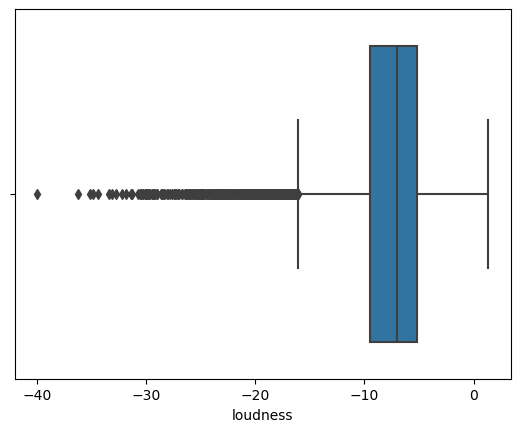

In [30]:
# Make a boxplot of loudness to search the presence of possible outliers

sns.boxplot(data=train_df, x='loudness')
plt.show()

In [31]:
# As mode is a categorical variable (binary), we calculate the number of samples for every category

train_df['mode'].value_counts()

1    9217
0    5179
Name: mode, dtype: int64

In [32]:
# Explore the relationship between mode & Class by making a crosstab

pd.crosstab(train_df['Class'], train_df['mode'])

mode,0,1
Class,,
0,98,402
1,375,723
2,354,664
3,111,211
4,20,290
5,549,608
6,694,1375
7,175,286
8,604,879


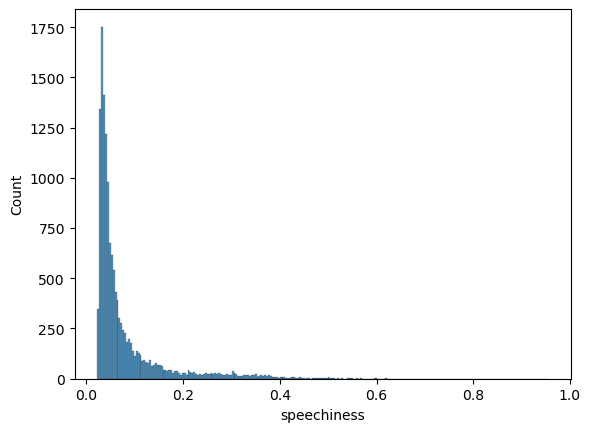

In [33]:
# Visualize the distribution of speechiness

sns.histplot(data=train_df, x='speechiness')
plt.show()

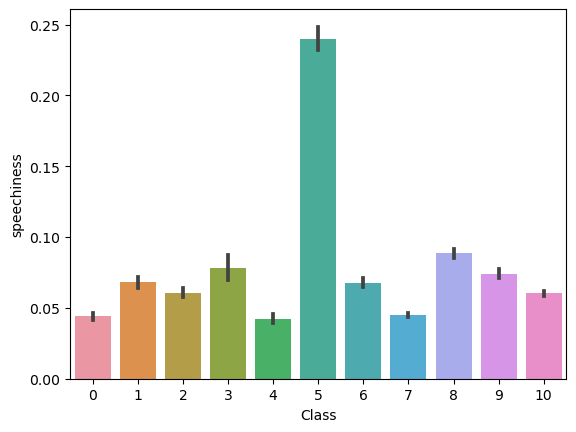

In [34]:
# Explore the relationship between speechiness & Class variables

sns.barplot(data=train_df, x='Class', y='speechiness')
plt.show()

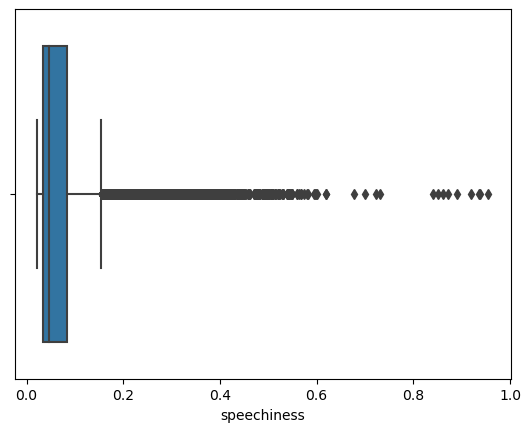

In [35]:
# Make a boxplot for speechiness variable to seek for outliers presence

sns.boxplot(data=train_df, x='speechiness')
plt.show()

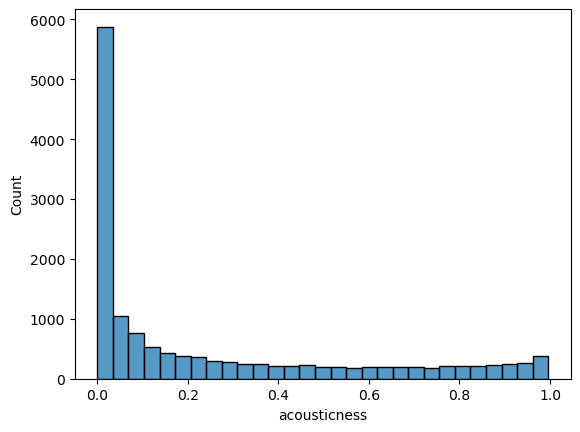

In [36]:
# Visualize the distribution of acousticness

sns.histplot(data=train_df, x='acousticness')
plt.show()

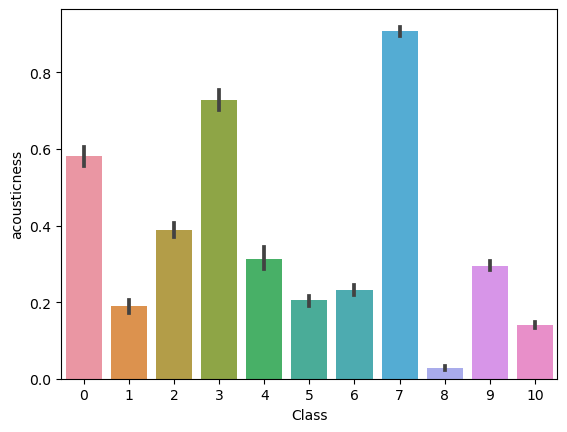

In [37]:
# Explore the relationship between acousticness & Class

sns.barplot(data=train_df, x='Class', y='acousticness')
plt.show()

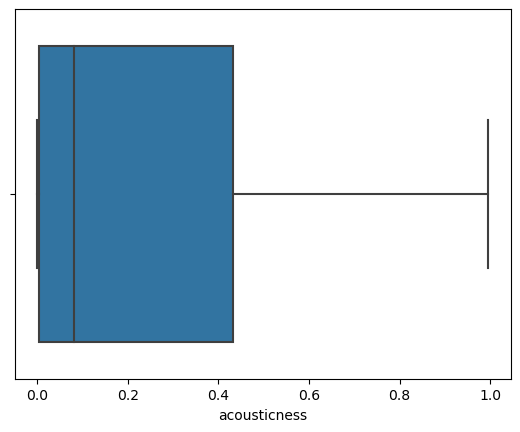

In [38]:
# Make a boxplot for acousticness to see if there are some outliers

sns.boxplot(data=train_df, x='acousticness')
plt.show()

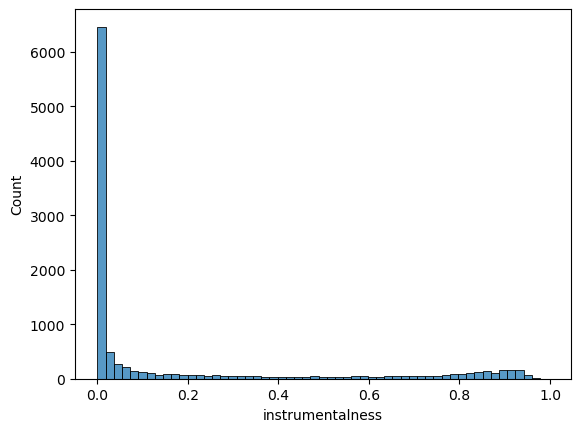

In [39]:
# Visualize the distribution of instrumentalness feature

sns.histplot(data=train_df, x='instrumentalness')
plt.show()

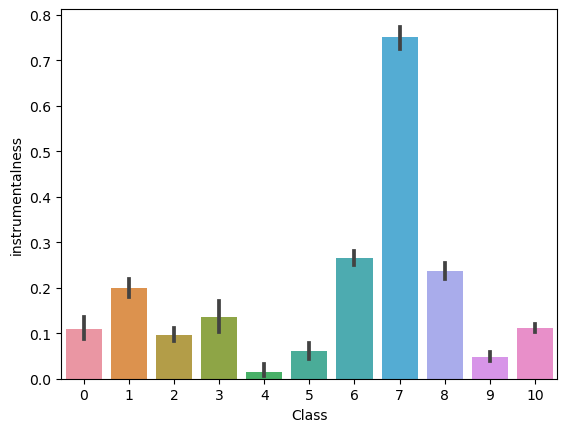

In [40]:
# Explore the relationship between instrumentalness and Class

sns.barplot(data=train_df, x='Class', y='instrumentalness')
plt.show()

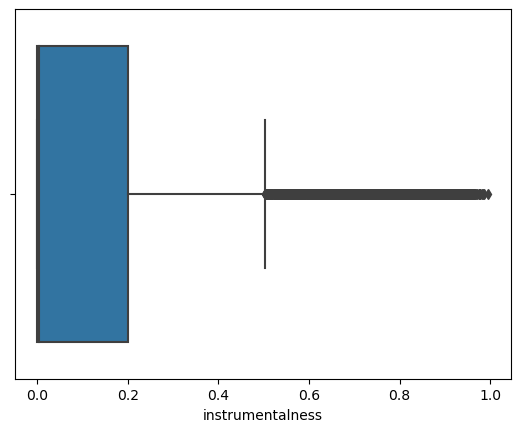

In [41]:
# Create a boxplot to see if there are outliers in instrumentalness variable

sns.boxplot(data=train_df, x='instrumentalness')
plt.show()

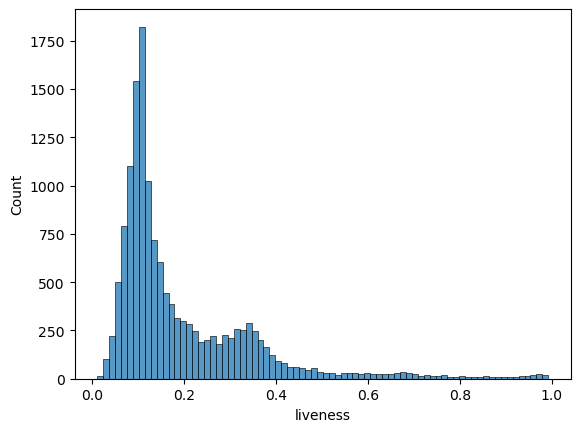

In [42]:
# Plot the distribution of liveness

sns.histplot(data=train_df, x='liveness')
plt.show()

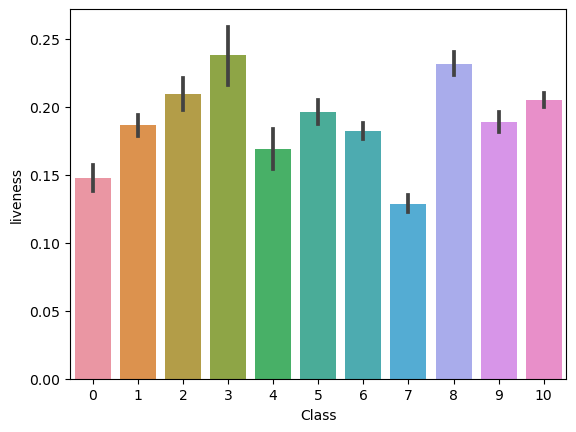

In [43]:
# Explore the relationship between liveness & Class

sns.barplot(data=train_df, x='Class', y='liveness')
plt.show()

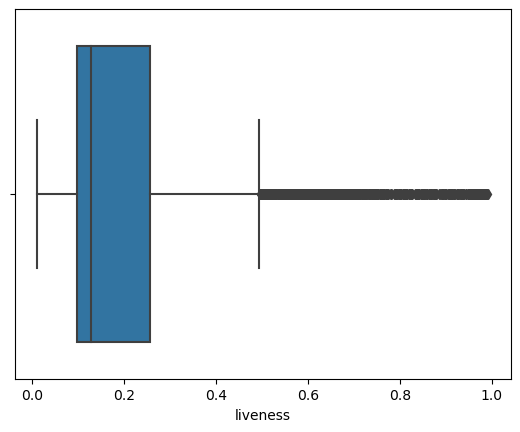

In [44]:
# Create a boxplot for liveness feature to explore the presence of outliers

sns.boxplot(data=train_df, x='liveness')
plt.show()

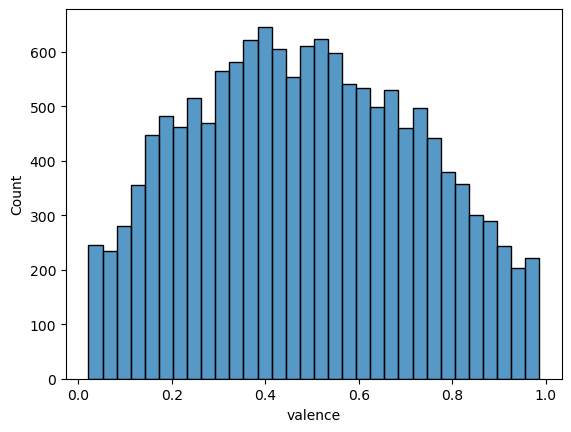

In [45]:
# Explore the distribution of valence

sns.histplot(data=train_df, x='valence')
plt.show()

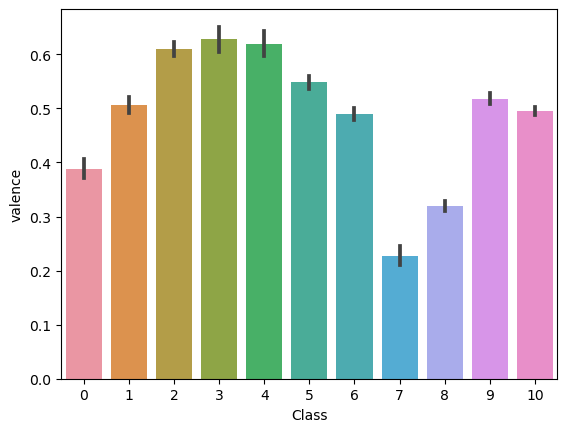

In [46]:
# Explore the relationship between valence & Class

sns.barplot(data=train_df, x='Class', y='valence')
plt.show()

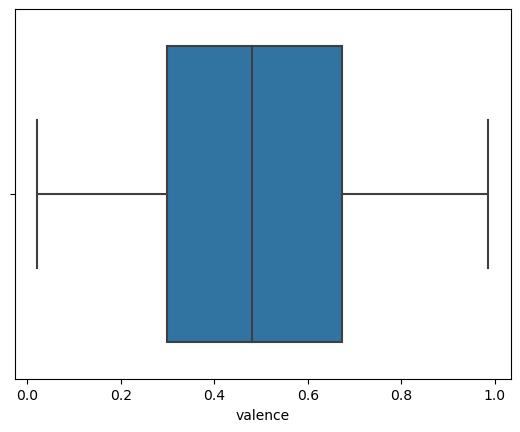

In [47]:
# Search for outliers within valence variable

sns.boxplot(data=train_df, x='valence')
plt.show()

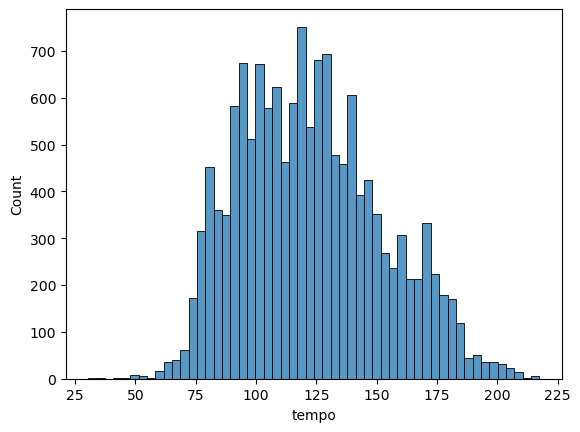

In [48]:
# Visualize the distribution of tempo

sns.histplot(data=train_df, x='tempo')
plt.show()

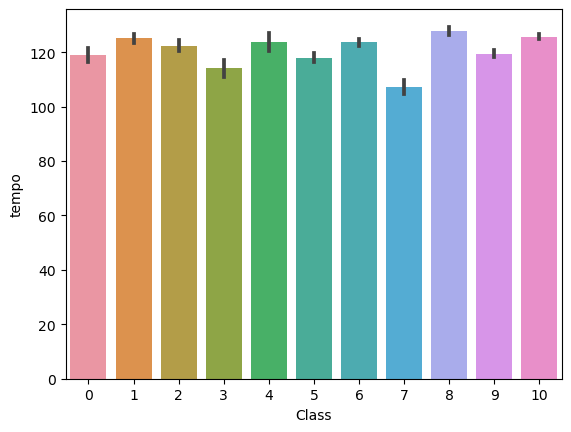

In [49]:
# Discover the relationship between tempo and Class

sns.barplot(data=train_df, x='Class', y='tempo')
plt.show()

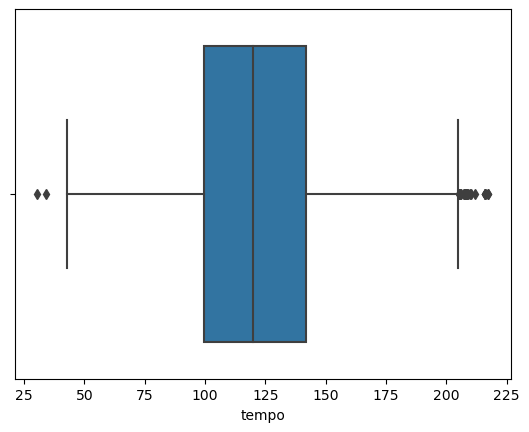

In [50]:
# Make a boxplot for tempo feature

sns.boxplot(data=train_df, x='tempo')
plt.show()

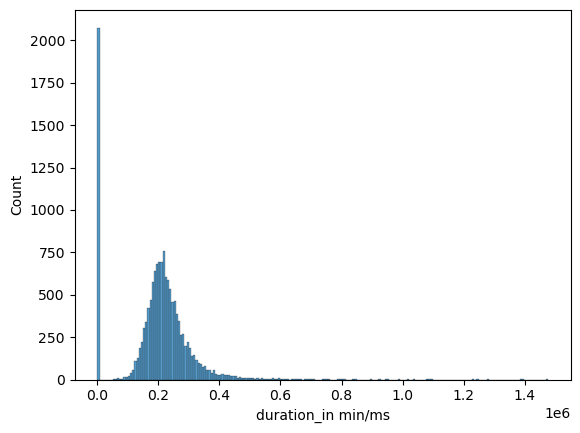

In [51]:
# Explore the distribution of duration_in min/ms

sns.histplot(data=train_df, x='duration_in min/ms')
plt.show()

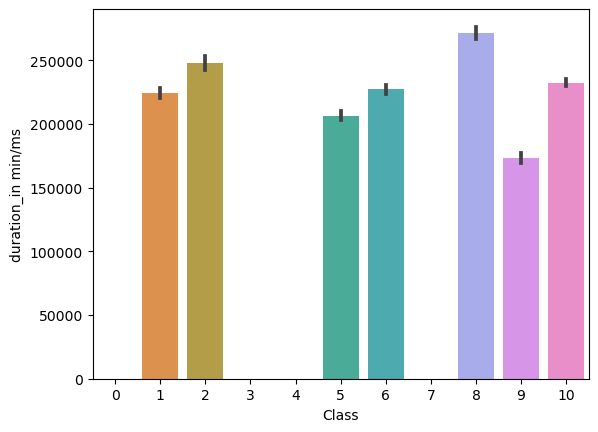

In [52]:
# Explore the relationship between duration_in min/ms & Class

sns.barplot(data=train_df, x='Class', y='duration_in min/ms')
plt.show()

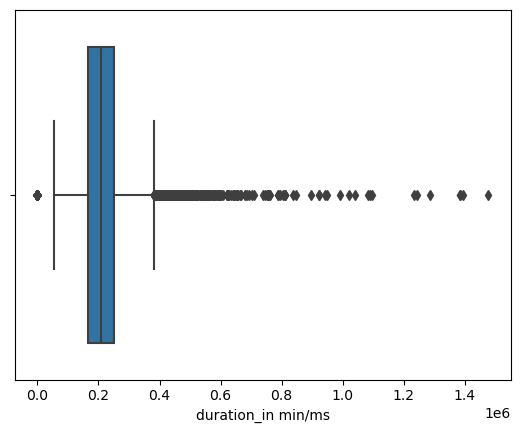

In [53]:
# Seek for outliers within duration_in min/ms variable

sns.boxplot(data=train_df, x='duration_in min/ms')
plt.show()

In [54]:
# Calculate the number of records for every time_signature category

train_df['time_signature'].value_counts()

4    13149
3      994
5      166
1       87
Name: time_signature, dtype: int64

In [55]:
# Discover the relationship between time_signature & Class variables

pd.crosstab(train_df['Class'], train_df['time_signature'])

time_signature,1,3,4,5
Class,,,,
0,5,50,433,12
1,5,50,1034,9
2,9,150,855,4
3,3,57,260,2
4,0,19,291,0
5,6,34,1080,37
6,8,114,1923,24
7,10,103,339,9
8,14,122,1331,16


In [56]:
# Calculate the number of samples for every category of the dependent variable

train_df['Class'].value_counts()

10    3959
6     2069
9     2019
8     1483
5     1157
1     1098
2     1018
0      500
7      461
3      322
4      310
Name: Class, dtype: int64

## Correlation

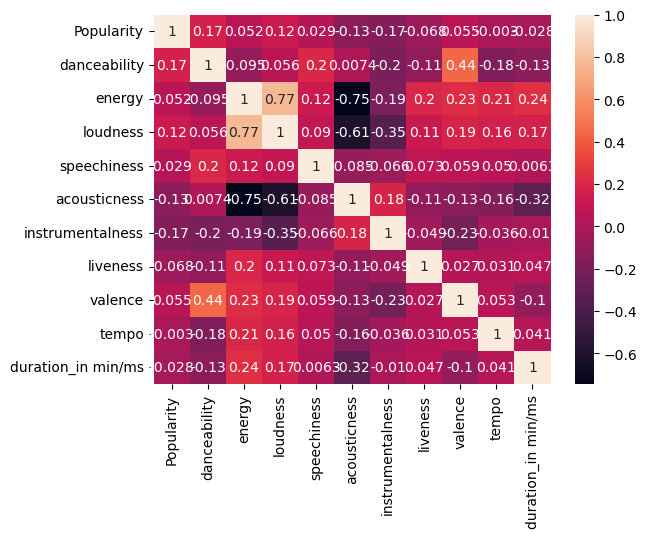

In [57]:
# We calculate correlation coefficients between all float features to see if there are any relationship between them

cols_for_correlation = ['Popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms']
sns.heatmap(train_df[cols_for_correlation].corr(), annot=True)
plt.show()

## Conclusions :

* We have 11 classes, so it's a multi-class problem.
* Id, Artist Name & Track Name cannot be used in the modeling process as they do not have so much information to add as predictors.
* Only Popularity, key & instrumentalness have null values. We should manage that.
* Energy & loudness have a right-skewed distribution. They need to be standardized.
* speechiness, acousticness, instrumentalness, liveness & duration_in min/ms have a left-skewed distribution. They need to be standardized.
* We need to scale all float features so they would be ready for modeling process.
* There are some duplicates in our data (They have the same Artist Name, Track Name & Class) which is not acceptable and needs to be dealed with. There are some tracks which have multiple classes (multi-label classes), so they are counted as duplicates even so they have the same artist and track name.
* Popularity, danceability, loudness, speechiness, instrumentalness, liveness, tempo & duration_in min/ms have outliers whether they are lower or upper ones, so we should handle that.
* Popularity, energy, loudness, mode, speechiness, acousticness, instrumentalness, valence, duration_in min/ms & time_signature are possible predictors that should be used in the modeling process.
* acousticness is highly negatively correlated with energy and loudness (-0.75 & -0.61 respectively) while energy & loudness are highly positively correlated with a coefficient of 0.77.

# Data Cleaning & Data Preprocessing

## Missing Values Imputation

In [4]:
# We calculate the mean & median values for Popularity feature

Mean_Population = train_df['Popularity'].mean()
Median_Population = train_df['Popularity'].median()
print('Mean Population by class :', Mean_Population)
print('Median Population by class :', Median_Population)

Mean Population by class : 44.525207992604706
Median Population by class : 44.0


All values in Popularity column are in the format of integers (floats with no decimals after the comma) so, it's more common to fill null values with the median.

In [5]:
# We impute missing values within Popularity variable and check the number of none values after the operation

train_df['Popularity'].fillna(Median_Population, inplace=True)
train_df.isna().sum()

Id                       0
Artist Name              0
Track Name               0
Popularity               0
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [6]:
# We calculate the mean, median and mode for key variable

Mean_key = train_df['key'].mean()
Median_key = train_df['key'].median()
Mode_key = train_df['key'].mode()[0]
print('Mean key :', Mean_key)
print('Median key :', Median_key)
print('Mode key :', Mode_key)

Mean key : 5.953781184015015
Median key : 6.0
Mode key : 7.0


In [7]:
# We calculate the number of null values within key variable for each category of Class feature to decide which value we should impute with

train_df.loc[train_df['key'].isna(), 'Class'].value_counts()

10    463
9     235
6     234
2     156
8     128
1     121
5      84
7      73
0      53
4      35
3      27
Name: Class, dtype: int64

Mean & Median are the same (6.0) but they are different from the mode (7.0). Adding to that, most records that has null values in key column has a class of 10, 9, 8, 6, 2 or 1 and we notice that the majority of records that are in this list of classes have a key of 6, so we'll impute the null values with the mean or median.

In [8]:
# We imputed key variable and check if there are still any null value in it

train_df['key'].fillna(Median_key, inplace=True)
train_df.isna().sum()

Id                       0
Artist Name              0
Track Name               0
Popularity               0
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [9]:
# We calculate the mean and median of instrumentalness variable

Mean_instrumentalness = train_df['instrumentalness'].mean()
Median_instrumentalness = train_df['instrumentalness'].median()
print('Mean instrumentalness :', Mean_instrumentalness)
print('Median instrumentalness :', Median_instrumentalness)

Mean instrumentalness : 0.17812871735974128
Median instrumentalness : 0.00392


As we noticed that instrumentalness have a left-skewed distribution, we should impute null values with the median so they don't get affected by outliers.

In [10]:
# We impute instrumentalness feature and check the number of null values after we treated this variable

train_df['instrumentalness'].fillna(Median_instrumentalness, inplace=True)
train_df.isna().sum()

Id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [11]:
# We calculate the number of null values for each variable in the test dataset

test_df.isna().sum()

Id                      0
Artist Name             0
Track Name              0
Popularity             95
danceability            0
energy                  0
key                   405
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness      836
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
dtype: int64

So we don't fell into <code>data leakage</code> issue, we'll use training dataset's statistics to impute test dataset's null values.

In [12]:
# We impute test dataset's null values with training dataset's descriptive statistics (median to be specific) and check the validity of the operation

test_df['Popularity'].fillna(Median_Population, inplace=True)
test_df['key'].fillna(Median_key, inplace=True)
test_df['instrumentalness'].fillna(Median_instrumentalness, inplace=True)
test_df.isna().sum()

Id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64

## Encoding Categorical Data

In [13]:
# Encoding Track and Artist Name features to be numerical so, they could be used in the modeling process

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_df['Track Name'])
encoded_tracks = le.transform(train_df['Track Name'])
le.fit(train_df['Artist Name'])
encoded_artists = le.transform(train_df['Artist Name'])
train_df['Track Name'] = encoded_tracks
train_df['Artist Name'] = encoded_artists
train_df.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,4260,6755,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,0.00392,0.106,0.235,152.429,204947.0,4,9
1,2,6558,4263,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.04680,0.104,0.380,132.921,191956.0,4,6
2,3,5639,11474,44.0,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.63500,0.284,0.635,159.953,161037.0,4,10
3,4,1750,6223,12.0,0.515,0.308,6.0,-14.711,1,0.0312,0.907000,0.02130,0.300,0.501,172.472,298093.0,3,2
4,5,1377,6441,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,0.00392,0.211,0.619,88.311,254145.0,4,5


# Feature Engineering

## Id

In [14]:
# We drop useless features (Id)

train_df.drop('Id', axis=1, inplace=True)
train_df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,4260,6755,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,0.00392,0.106,0.235,152.429,204947.0,4,9
1,6558,4263,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.04680,0.104,0.380,132.921,191956.0,4,6
2,5639,11474,44.0,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.63500,0.284,0.635,159.953,161037.0,4,10
3,1750,6223,12.0,0.515,0.308,6.0,-14.711,1,0.0312,0.907000,0.02130,0.300,0.501,172.472,298093.0,3,2
4,1377,6441,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,0.00392,0.211,0.619,88.311,254145.0,4,5


## Popularity

In [15]:
# Create 5-point buckets for popularity feature

train_df['Popularity_bucket'] = train_df['Popularity'].apply(lambda x : int(x/5))
train_df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Popularity_bucket
0,4260,6755,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,0.00392,0.106,0.235,152.429,204947.0,4,9,7
1,6558,4263,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.04680,0.104,0.380,132.921,191956.0,4,6,13
2,5639,11474,44.0,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.63500,0.284,0.635,159.953,161037.0,4,10,8
3,1750,6223,12.0,0.515,0.308,6.0,-14.711,1,0.0312,0.907000,0.02130,0.300,0.501,172.472,298093.0,3,2,2
4,1377,6441,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,0.00392,0.211,0.619,88.311,254145.0,4,5,9


In [16]:
# Now, we'll drop Popularity column as we don't need it anymore

train_df.drop('Popularity', axis=1, inplace=True)
train_df.head()

,Artist Name,Track Name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Popularity_bucket
0,4260,6755,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,0.00392,0.106,0.235,152.429,204947.0,4,9,7
1,6558,4263,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.04680,0.104,0.380,132.921,191956.0,4,6,13
2,5639,11474,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.63500,0.284,0.635,159.953,161037.0,4,10,8
3,1750,6223,0.515,0.308,6.0,-14.711,1,0.0312,0.907000,0.02130,0.300,0.501,172.472,298093.0,3,2,2
4,1377,6441,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,0.00392,0.211,0.619,88.311,254145.0,4,5,9


## duration_in min/ms

After exploring duration_in min/ms column, we figured out that some records have a duration in minutes while others have been measured in milliseconds which gonna make our data a little bit noisy. Also, we have discovered that when duration is under 30 we can classify it as in minutes. So, we'll transform our data that way so it could be measured only in minutes.

In [17]:
# Create a column that records whether a duration is in minutes or not

train_df['in_minutes'] = train_df['duration_in min/ms'].apply(lambda x : x<30)
train_df.head()

,Artist Name,Track Name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Popularity_bucket,in_minutes
0,4260,6755,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,0.00392,0.106,0.235,152.429,204947.0,4,9,7,False
1,6558,4263,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.04680,0.104,0.380,132.921,191956.0,4,6,13,False
2,5639,11474,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.63500,0.284,0.635,159.953,161037.0,4,10,8,False
3,1750,6223,0.515,0.308,6.0,-14.711,1,0.0312,0.907000,0.02130,0.300,0.501,172.472,298093.0,3,2,2,False
4,1377,6441,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,0.00392,0.211,0.619,88.311,254145.0,4,5,9,False


In [18]:
# Create a column that holds track's duration only in minutes

train_df['duration_minutes'] = train_df.apply(lambda row : row['duration_in min/ms'] if row['in_minutes'] else row['duration_in min/ms'] / 60000, axis=1)
train_df.head()

,Artist Name,Track Name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Popularity_bucket,in_minutes,duration_minutes
0,4260,6755,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,0.00392,0.106,0.235,152.429,204947.0,4,9,7,False,3.415783
1,6558,4263,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.04680,0.104,0.380,132.921,191956.0,4,6,13,False,3.199267
2,5639,11474,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.63500,0.284,0.635,159.953,161037.0,4,10,8,False,2.683950
3,1750,6223,0.515,0.308,6.0,-14.711,1,0.0312,0.907000,0.02130,0.300,0.501,172.472,298093.0,3,2,2,False,4.968217
4,1377,6441,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,0.00392,0.211,0.619,88.311,254145.0,4,5,9,False,4.235750


In [19]:
# Now, we drop duration_in min/ms & in_minutes variables after creating duration_minutes as we don't need them anymore

train_df.drop(['duration_in min/ms', 'in_minutes'], axis=1, inplace=True)
train_df.head()

,Artist Name,Track Name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Class,Popularity_bucket,duration_minutes
0,4260,6755,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,0.00392,0.106,0.235,152.429,4,9,7,3.415783
1,6558,4263,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.04680,0.104,0.380,132.921,4,6,13,3.199267
2,5639,11474,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.63500,0.284,0.635,159.953,4,10,8,2.683950
3,1750,6223,0.515,0.308,6.0,-14.711,1,0.0312,0.907000,0.02130,0.300,0.501,172.472,3,2,2,4.968217
4,1377,6441,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,0.00392,0.211,0.619,88.311,4,5,9,4.235750


# Modeling

## Data Preparation

In [20]:
# Define the independent and dependent features to work with

X = train_df.drop('Class', axis=1)
y = train_df['Class']

In [21]:
# Split up the data into training and testing subsets to avoid overfitting with a stratified response variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0, stratify=y)

## Standardization

In [22]:
# We standardize our data so it could be suitable for modeling

from sklearn.preprocessing import StandardScaler
sc_scaler = StandardScaler()
sc_scaler.fit(X_train)
X_train = pd.DataFrame(sc_scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(sc_scaler.transform(X_test), columns=X_test.columns)

## Feature Selection

In [23]:
# We use variance Threshold Technique for feature selection

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=.2, random_state=0, stratify=y)

from sklearn.feature_selection import VarianceThreshold
sel_1 = VarianceThreshold(threshold=.02)
sel_1.fit(X_train_1)
print('Selection of features :', sel_1.get_support())
print('Selected features :', list(X.columns[sel_1.get_support()]))
print('Deleted features :', list(X.columns[~sel_1.get_support()]))

Selection of features : [ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True]
Selected features : ['Artist Name', 'Track Name', 'danceability', 'energy', 'key', 'loudness', 'mode', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'Popularity_bucket', 'duration_minutes']
Deleted features : ['speechiness']


In [24]:
# We use KBest Technique for feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
sel_2 = SelectKBest(score_func=f_classif, k=8)
sel_2.fit(X_train, y_train)
print('Selection of features :', sel_2.get_support())
print('Scores of features :', sel_2.scores_)
print('Selected features :', list(X.columns[sel_2.get_support()]))
print('Deleted features :', list(X.columns[~sel_2.get_support()]))

Selection of features : [False False  True  True False  True False  True  True  True False  True
 False False  True False]
Scores of features : [ 13.68690219  23.10083649 364.46856068 510.56747478   1.69030749
 494.77441279  27.156195   577.3773257  594.82581347 370.1136347
  23.92193769 177.52992472  24.90673065  28.97687507 133.86421771
  75.86475717]
Selected features : ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'Popularity_bucket']
Deleted features : ['Artist Name', 'Track Name', 'key', 'mode', 'liveness', 'tempo', 'time_signature', 'duration_minutes']


In [25]:
# We use Correlation Technique for feature selection

def correlatedFeatures(dataset, threshold):
    correlated_columns = set()
    correlations = dataset.corr()
    for i in range(len(correlations)):
        for j in range(i):
            if abs(correlations.iloc[i,j]) > threshold:
                correlated_columns.add(correlations.columns[i])
    return correlated_columns

cf = correlatedFeatures(X_train, .7)
cf

{'acousticness', 'loudness'}

## Logistic Regression

In [27]:
# We'll train a logistic regression model on all features that we have

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred_LogReg_train = LogReg.predict(X_train)
y_pred_LogReg_test = LogReg.predict(X_test)
print('The training accuracy score is:', accuracy_score(y_train, y_pred_LogReg_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_LogReg_test))

The training accuracy score is: 0.46118443904133377
The test accuracy score is: 0.45729166666666665


In [107]:
# In here, we are training a logistic regression model on only selected features using first selector

selected_features = list(X.columns[sel_1.get_support()])
LogReg = LogisticRegression()
LogReg.fit(X_train[selected_features], y_train)
y_pred_LogReg_train = LogReg.predict(X_train[selected_features])
y_pred_LogReg_test = LogReg.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_LogReg_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_LogReg_test))

The training accuracy score is: 0.4338311913858979
The test accuracy score is: 0.43506944444444445


In [108]:
# In here, we are training a logistic regression model on only selected features using second selector

selected_features = list(X.columns[sel_2.get_support()])
LogReg = LogisticRegression()
LogReg.fit(X_train[selected_features], y_train)
y_pred_LogReg_train = LogReg.predict(X_train[selected_features])
y_pred_LogReg_test = LogReg.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_LogReg_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_LogReg_test))

The training accuracy score is: 0.4468565474122959
The test accuracy score is: 0.440625


In [109]:
# In here, we are training a logistic regression model on only selected features using third selector

all_features = set(X.columns)
selected_features = list(all_features.difference(cf))
LogReg = LogisticRegression()
LogReg.fit(X_train[selected_features], y_train)
y_pred_LogReg_train = LogReg.predict(X_train[selected_features])
y_pred_LogReg_test = LogReg.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_LogReg_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_LogReg_test))

The training accuracy score is: 0.44346995484543245
The test accuracy score is: 0.4375


In [34]:
# We use RFE Technique for feature selection

from sklearn.feature_selection import RFE
model = LogisticRegression()
sel_3 = RFE(model, n_features_to_select=15)
sel_3.fit(X_train, y_train)
print('Selection of features :', sel_3.support_)
print('Ranking of features :', sel_3.ranking_)
print('Selected features :', list(X.columns[sel_3.support_]))
print('Deleted features :', list(X.columns[~sel_3.support_]))

Selection of features : [ True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True]
Ranking of features : [1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1]
Selected features : ['Artist Name', 'Track Name', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'Popularity_bucket', 'duration_minutes']
Deleted features : ['key']


In [119]:
# In here, we are training a logistic regression model on only selected features using fourth selector

selected_features = list(X.columns[sel_3.support_])
LogReg = LogisticRegression()
LogReg.fit(X_train[selected_features], y_train)
y_pred_LogReg_train = LogReg.predict(X_train[selected_features])
y_pred_LogReg_test = LogReg.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_LogReg_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_LogReg_test))

The training accuracy score is: 0.46161861757554706
The test accuracy score is: 0.4576388888888889


## Decision Tree Classifier

In [122]:
# Train a decision tree classifier on all features

from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier()
Tree.fit(X_train, y_train)
y_pred_Tree_train = Tree.predict(X_train)
y_pred_Tree_test = Tree.predict(X_test)
print('The training accuracy score is:', accuracy_score(y_train, y_pred_Tree_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_Tree_test))

The training accuracy score is: 0.9373914553664466
The test accuracy score is: 0.3260416666666667


In [123]:
# Train a decision tree classifier on features selected using first selector

selected_features = list(X.columns[sel_1.get_support()])
Tree = DecisionTreeClassifier()
Tree.fit(X_train[selected_features], y_train)
y_pred_Tree_train = Tree.predict(X_train[selected_features])
y_pred_Tree_test = Tree.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_Tree_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_Tree_test))

The training accuracy score is: 0.9373914553664466
The test accuracy score is: 0.31319444444444444


In [124]:
# Train a decision tree classifier on features selected using second selector

selected_features = list(X.columns[sel_2.get_support()])
Tree = DecisionTreeClassifier()
Tree.fit(X_train[selected_features], y_train)
y_pred_Tree_train = Tree.predict(X_train[selected_features])
y_pred_Tree_test = Tree.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_Tree_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_Tree_test))

The training accuracy score is: 0.9351337269885377
The test accuracy score is: 0.30520833333333336


In [125]:
# Train a decision tree classifier on features selected using third selector

all_features = set(X.columns)
selected_features = list(all_features.difference(cf))
Tree = DecisionTreeClassifier()
Tree.fit(X_train[selected_features], y_train)
y_pred_Tree_train = Tree.predict(X_train[selected_features])
y_pred_Tree_test = Tree.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_Tree_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_Tree_test))

The training accuracy score is: 0.9373914553664466
The test accuracy score is: 0.3125


In [138]:
# We use RFE Technique for feature selection

model = DecisionTreeClassifier()
sel_3 = RFE(model, n_features_to_select=12)
sel_3.fit(X_train, y_train)
print('Selection of features :', sel_3.support_)
print('Ranking of features :', sel_3.ranking_)
print('Selected features :', list(X.columns[sel_3.support_]))
print('Deleted features :', list(X.columns[~sel_3.support_]))

Selection of features : [ True  True  True  True False  True False  True  True  True False  True
  True False  True  True]
Ranking of features : [1 1 1 1 3 1 4 1 1 1 2 1 1 5 1 1]
Selected features : ['Artist Name', 'Track Name', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'Popularity_bucket', 'duration_minutes']
Deleted features : ['key', 'mode', 'liveness', 'time_signature']


In [144]:
# Train a decision tree classifier on features selected using fourth selector

selected_features = list(X.columns[sel_3.support_])
Tree = DecisionTreeClassifier()
Tree.fit(X_train[selected_features], y_train)
y_pred_Tree_train = Tree.predict(X_train[selected_features])
y_pred_Tree_test = Tree.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_Tree_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_Tree_test))

The training accuracy score is: 0.9373914553664466
The test accuracy score is: 0.33645833333333336


## Random Forest Classifier

In [145]:
# Train a random forest classifier on all features that we have

from sklearn.ensemble import RandomForestClassifier
Forest = RandomForestClassifier()
Forest.fit(X_train, y_train)
y_pred_Forest_train = Forest.predict(X_train)
y_pred_Forest_test = Forest.predict(X_test)
print('The training accuracy score is:', accuracy_score(y_train, y_pred_Forest_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_Forest_test))

The training accuracy score is: 0.9373914553664466
The test accuracy score is: 0.4809027777777778


In [146]:
# Train a random forest classifier on selected features using first selector

selected_features = list(X.columns[sel_1.get_support()])
Forest = RandomForestClassifier()
Forest.fit(X_train[selected_features], y_train)
y_pred_Forest_train = Forest.predict(X_train[selected_features])
y_pred_Forest_test = Forest.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_Forest_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_Forest_test))

The training accuracy score is: 0.9373914553664466
The test accuracy score is: 0.4545138888888889


In [147]:
# Train a random forest classifier on selected features using second selector

selected_features = list(X.columns[sel_2.get_support()])
Forest = RandomForestClassifier()
Forest.fit(X_train[selected_features], y_train)
y_pred_Forest_train = Forest.predict(X_train[selected_features])
y_pred_Forest_test = Forest.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_Forest_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_Forest_test))

The training accuracy score is: 0.9351337269885377
The test accuracy score is: 0.4371527777777778


In [176]:
# Train a random forest classifier on selected features using third selector

all_features = set(X.columns)
selected_features = list(all_features.difference(cf))
Forest = RandomForestClassifier()
Forest.fit(X_train[selected_features], y_train)
y_pred_Forest_train = Forest.predict(X_train[selected_features])
y_pred_Forest_test = Forest.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_Forest_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_Forest_test))

The training accuracy score is: 0.9373914553664466
The test accuracy score is: 0.44930555555555557


In [161]:
# We use RFE Technique for feature selection

model = RandomForestClassifier()
sel_3 = RFE(model, n_features_to_select=13)
sel_3.fit(X_train, y_train)
print('Selection of features :', sel_3.support_)
print('Ranking of features :', sel_3.ranking_)
print('Selected features :', list(X.columns[sel_3.support_]))
print('Deleted features :', list(X.columns[~sel_3.support_]))

Selection of features : [ True  True  True  True False  True False  True  True  True  True  True
  True False  True  True]
Ranking of features : [1 1 1 1 2 1 3 1 1 1 1 1 1 4 1 1]
Selected features : ['Artist Name', 'Track Name', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'Popularity_bucket', 'duration_minutes']
Deleted features : ['key', 'mode', 'time_signature']


In [162]:
# Train a random forest classifier on selected features using fourth selector

selected_features = list(X.columns[sel_3.support_])
Forest = RandomForestClassifier()
Forest.fit(X_train[selected_features], y_train)
y_pred_Forest_train = Forest.predict(X_train[selected_features])
y_pred_Forest_test = Forest.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_Forest_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_Forest_test))

The training accuracy score is: 0.9373914553664466
The test accuracy score is: 0.47118055555555555


## Support Vector Machines (SVM)

In [163]:
# Train an SVM model on all features

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm_train = svm.predict(X_train)
y_pred_svm_test = svm.predict(X_test)
print('The training accuracy score is:', accuracy_score(y_train, y_pred_svm_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_svm_test))

The training accuracy score is: 0.544112539076068
The test accuracy score is: 0.4909722222222222


In [164]:
# Train an SVM model on selected features using first selector

selected_features = list(X.columns[sel_1.get_support()])
svm = SVC()
svm.fit(X_train[selected_features], y_train)
y_pred_svm_train = svm.predict(X_train[selected_features])
y_pred_svm_test = svm.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_svm_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_svm_test))

The training accuracy score is: 0.5280479333101772
The test accuracy score is: 0.46597222222222223


In [165]:
# Train an SVM model on selected features using second selector

selected_features = list(X.columns[sel_2.get_support()])
svm = SVC()
svm.fit(X_train[selected_features], y_train)
y_pred_svm_train = svm.predict(X_train[selected_features])
y_pred_svm_test = svm.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_svm_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_svm_test))

The training accuracy score is: 0.4839353942341091
The test accuracy score is: 0.47708333333333336


In [177]:
# Train an SVM model on selected features using third selector

all_features = set(X.columns)
selected_features = list(all_features.difference(cf))
svm = SVC()
svm.fit(X_train[selected_features], y_train)
y_pred_svm_train = svm.predict(X_train[selected_features])
y_pred_svm_test = svm.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_svm_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_svm_test))

The training accuracy score is: 0.52257728377909
The test accuracy score is: 0.4597222222222222


## K-Neighbors Classifier

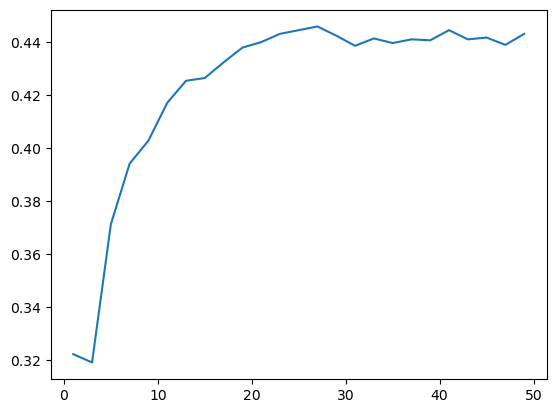

In [169]:
# Try a set of n_neighbors to extract the best value for this hyperparameter

from sklearn.neighbors import KNeighborsClassifier
n_neighbors = [i for i in range(1, 50, 2)]
test_accuracy = []
for neighbor in n_neighbors:
    neighbor = KNeighborsClassifier(n_neighbors=neighbor)
    neighbor.fit(X_train, y_train)
    y_pred_neighbor = neighbor.predict(X_test)
    test_accuracy.append(accuracy_score(y_test, y_pred_neighbor))
    
plt.plot(n_neighbors, test_accuracy)
plt.show()

So, it looks that the best n_neighbors hyperparameter is 27 which gives the highest test accuracy.

In [170]:
# Train a k_neighbors classifier on all features

neighbor = KNeighborsClassifier(n_neighbors=27)
neighbor.fit(X_train, y_train)
y_pred_neighbor_train = neighbor.predict(X_train)
y_pred_neighbor_test = neighbor.predict(X_test)
print('The training accuracy score is:', accuracy_score(y_train, y_pred_neighbor_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_neighbor_test))

The training accuracy score is: 0.4880166724557138
The test accuracy score is: 0.44583333333333336


In [173]:
# Train a k_neighbors classifier on selected features using first selector

selected_features = list(X.columns[sel_1.get_support()])
neighbor = KNeighborsClassifier(n_neighbors=27)
neighbor.fit(X_train[selected_features], y_train)
y_pred_neighbor_train = neighbor.predict(X_train[selected_features])
y_pred_neighbor_test = neighbor.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_neighbor_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_neighbor_test))

The training accuracy score is: 0.4645710316081973
The test accuracy score is: 0.41770833333333335


In [174]:
# Train a k_neighbors classifier on selected features using second selector

selected_features = list(X.columns[sel_2.get_support()])
neighbor = KNeighborsClassifier(n_neighbors=27)
neighbor.fit(X_train[selected_features], y_train)
y_pred_neighbor_train = neighbor.predict(X_train[selected_features])
y_pred_neighbor_test = neighbor.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_neighbor_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_neighbor_test))

The training accuracy score is: 0.4848037513025356
The test accuracy score is: 0.44548611111111114


In [178]:
# Train a k_neighbors classifier on selected features using third selector

all_features = set(X.columns)
selected_features = list(all_features.difference(cf))
neighbor = KNeighborsClassifier(n_neighbors=27)
neighbor.fit(X_train[selected_features], y_train)
y_pred_neighbor_train = neighbor.predict(X_train[selected_features])
y_pred_neighbor_test = neighbor.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_neighbor_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_neighbor_test))

The training accuracy score is: 0.4681312955887461
The test accuracy score is: 0.4184027777777778


## Gaussian Naive Bayes

In [181]:
# Train a Gaussian NB model on all features

from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred_gaussian_train = gaussian.predict(X_train)
y_pred_gaussian_test = gaussian.predict(X_test)
print('The training accuracy score is:', accuracy_score(y_train, y_pred_gaussian_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_gaussian_test))

The training accuracy score is: 0.3644494616186176
The test accuracy score is: 0.38090277777777776


In [182]:
# Train a Gaussian NB model on selected features using first selector

selected_features = list(X.columns[sel_1.get_support()])
gaussian = GaussianNB()
gaussian.fit(X_train[selected_features], y_train)
y_pred_gaussian_train = gaussian.predict(X_train[selected_features])
y_pred_gaussian_test = gaussian.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_gaussian_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_gaussian_test))

The training accuracy score is: 0.3410038207711011
The test accuracy score is: 0.36041666666666666


In [183]:
# Train a Gaussian NB model on selected features using second selector

selected_features = list(X.columns[sel_2.get_support()])
gaussian = GaussianNB()
gaussian.fit(X_train[selected_features], y_train)
y_pred_gaussian_train = gaussian.predict(X_train[selected_features])
y_pred_gaussian_test = gaussian.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_gaussian_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_gaussian_test))

The training accuracy score is: 0.37122264675234456
The test accuracy score is: 0.3840277777777778


In [184]:
# Train a Gaussian NB model on selected features using third selector

all_features = set(X.columns)
selected_features = list(all_features.difference(cf))
gaussian = GaussianNB()
gaussian.fit(X_train[selected_features], y_train)
y_pred_gaussian_train = gaussian.predict(X_train[selected_features])
y_pred_gaussian_test = gaussian.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_gaussian_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_gaussian_test))

The training accuracy score is: 0.3399617922889892
The test accuracy score is: 0.35555555555555557


## Linear SVC

In [186]:
# Train a Linear SVC model on all features

from sklearn.svm import LinearSVC
linear_svm = LinearSVC()
linear_svm.fit(X_train, y_train)
y_pred_linear_svm_train = linear_svm.predict(X_train)
y_pred_linear_svm_test = linear_svm.predict(X_test)
print('The training accuracy score is:', accuracy_score(y_train, y_pred_linear_svm_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_linear_svm_test))

The training accuracy score is: 0.44815908301493573
The test accuracy score is: 0.453125


In [188]:
# Train a Linear SVC model on selected features using first selector

selected_features = list(X.columns[sel_1.get_support()])
linear_svm = LinearSVC()
linear_svm.fit(X_train[selected_features], y_train)
y_pred_linear_svm_train = linear_svm.predict(X_train[selected_features])
y_pred_linear_svm_test = linear_svm.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_linear_svm_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_linear_svm_test))

The training accuracy score is: 0.4248002778742619
The test accuracy score is: 0.4236111111111111


In [189]:
# Train a Linear SVC model on selected features using second selector

selected_features = list(X.columns[sel_2.get_support()])
linear_svm = LinearSVC()
linear_svm.fit(X_train[selected_features], y_train)
y_pred_linear_svm_train = linear_svm.predict(X_train[selected_features])
y_pred_linear_svm_test = linear_svm.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_linear_svm_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_linear_svm_test))

The training accuracy score is: 0.4372177839527614
The test accuracy score is: 0.43194444444444446


In [190]:
# Train a Linear SVC model on selected features using third selector

all_features = set(X.columns)
selected_features = list(all_features.difference(cf))
linear_svm = LinearSVC()
linear_svm.fit(X_train[selected_features], y_train)
y_pred_linear_svm_train = linear_svm.predict(X_train[selected_features])
y_pred_linear_svm_test = linear_svm.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_linear_svm_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_linear_svm_test))

The training accuracy score is: 0.428534213268496
The test accuracy score is: 0.4329861111111111


In [195]:
# We use RFE Technique for feature selection

model = LinearSVC()
sel_3 = RFE(model, n_features_to_select=14)
sel_3.fit(X_train, y_train)
print('Selection of features :', sel_3.support_)
print('Ranking of features :', sel_3.ranking_)
print('Selected features :', list(X.columns[sel_3.support_]))
print('Deleted features :', list(X.columns[~sel_3.support_]))

Selection of features : [ True  True  True  True False  True  True  True  True  True False  True
  True  True  True  True]
Ranking of features : [1 1 1 1 3 1 1 1 1 1 2 1 1 1 1 1]
Selected features : ['Artist Name', 'Track Name', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'time_signature', 'Popularity_bucket', 'duration_minutes']
Deleted features : ['key', 'liveness']


In [196]:
# Train a Linear SVC model on selected features using fourth selector

selected_features = list(X.columns[sel_3.support_])
linear_svm = LinearSVC()
linear_svm.fit(X_train[selected_features], y_train)
y_pred_linear_svm_train = linear_svm.predict(X_train[selected_features])
y_pred_linear_svm_test = linear_svm.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_linear_svm_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_linear_svm_test))

The training accuracy score is: 0.4486800972559917
The test accuracy score is: 0.4482638888888889


## Gradient Boosting Classifier

In [28]:
# Train a gradient boosting model on all features

from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_pred_gb_clf_train = gb_clf.predict(X_train)
y_pred_gb_clf_test = gb_clf.predict(X_test)
print('The training accuracy score is:', accuracy_score(y_train, y_pred_gb_clf_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_gb_clf_test))

The training accuracy score is: 0.6224383466481417
The test accuracy score is: 0.5246527777777777


In [29]:
# Train a gradient boosting model on selected features using first selector

selected_features = list(X.columns[sel_1.get_support()])
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train[selected_features], y_train)
y_pred_gb_clf_train = gb_clf.predict(X_train[selected_features])
y_pred_gb_clf_test = gb_clf.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_gb_clf_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_gb_clf_test))

The training accuracy score is: 0.6064605765890935
The test accuracy score is: 0.5107638888888889


In [30]:
# Train a gradient boosting model on selected features using second selector

selected_features = list(X.columns[sel_2.get_support()])
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train[selected_features], y_train)
y_pred_gb_clf_train = gb_clf.predict(X_train[selected_features])
y_pred_gb_clf_test = gb_clf.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_gb_clf_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_gb_clf_test))

The training accuracy score is: 0.5726814866273011
The test accuracy score is: 0.490625


In [31]:
# Train a gradient boosting model on selected features using third selector

all_features = set(X.columns)
selected_features = list(all_features.difference(cf))
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train[selected_features], y_train)
y_pred_gb_clf_train = gb_clf.predict(X_train[selected_features])
y_pred_gb_clf_test = gb_clf.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_gb_clf_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_gb_clf_test))

The training accuracy score is: 0.6094129906217437
The test accuracy score is: 0.496875


In [41]:
# We use RFE Technique for feature selection

model = GradientBoostingClassifier()
sel_3 = RFE(model, n_features_to_select=14)
sel_3.fit(X_train, y_train)
print('Selection of features :', sel_3.support_)
print('Ranking of features :', sel_3.ranking_)
print('Selected features :', list(X.columns[sel_3.support_]))
print('Deleted features :', list(X.columns[~sel_3.support_]))

Selection of features : [ True  True  True  True False  True False  True  True  True  True  True
  True  True  True  True]
Ranking of features : [1 1 1 1 2 1 3 1 1 1 1 1 1 1 1 1]
Selected features : ['Artist Name', 'Track Name', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'Popularity_bucket', 'duration_minutes']
Deleted features : ['key', 'mode']


In [42]:
# Train a gradient boosting model on selected features using fourth selector

selected_features = list(X.columns[sel_3.support_])
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train[selected_features], y_train)
y_pred_gb_clf_train = gb_clf.predict(X_train[selected_features])
y_pred_gb_clf_test = gb_clf.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_gb_clf_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_gb_clf_test))

The training accuracy score is: 0.6207884682181313
The test accuracy score is: 0.5225694444444444


## Stochastic Gradient Descent Classifier

In [43]:
# Train a stochastic gradient descent model on all features

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
y_pred_sgd_clf_train = sgd_clf.predict(X_train)
y_pred_sgd_clf_test = sgd_clf.predict(X_test)
print('The training accuracy score is:', accuracy_score(y_train, y_pred_sgd_clf_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_sgd_clf_test))

The training accuracy score is: 0.39657867315039946
The test accuracy score is: 0.4010416666666667


In [44]:
# Train a stochastic gradient descent model on selected features using first selector

selected_features = list(X.columns[sel_1.get_support()])
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train[selected_features], y_train)
y_pred_sgd_clf_train = sgd_clf.predict(X_train[selected_features])
y_pred_sgd_clf_test = sgd_clf.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_sgd_clf_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_sgd_clf_test))

The training accuracy score is: 0.3375303924973949
The test accuracy score is: 0.3388888888888889


In [45]:
# Train a stochastic gradient descent model on selected features using second selector

selected_features = list(X.columns[sel_2.get_support()])
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train[selected_features], y_train)
y_pred_sgd_clf_train = sgd_clf.predict(X_train[selected_features])
y_pred_sgd_clf_test = sgd_clf.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_sgd_clf_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_sgd_clf_test))

The training accuracy score is: 0.38494268843348384
The test accuracy score is: 0.3888888888888889


In [46]:
# Train a stochastic gradient descent model on selected features using third selector

all_features = set(X.columns)
selected_features = list(all_features.difference(cf))
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train[selected_features], y_train)
y_pred_sgd_clf_train = sgd_clf.predict(X_train[selected_features])
y_pred_sgd_clf_test = sgd_clf.predict(X_test[selected_features])
print('The training accuracy score is:', accuracy_score(y_train, y_pred_sgd_clf_train))
print('The test accuracy score is:', accuracy_score(y_test, y_pred_sgd_clf_test))

The training accuracy score is: 0.3469954845432442
The test accuracy score is: 0.3486111111111111


In [48]:
# We use RFE Technique for feature selection

model = SGDClassifier()
sel_3 = RFE(model, n_features_to_select=15)
sel_3.fit(X_train, y_train)
print('Selection of features :', sel_3.support_)
print('Ranking of features :', sel_3.ranking_)
print('Selected features :', list(X.columns[sel_3.support_]))
print('Deleted features :', list(X.columns[~sel_3.support_]))

Selection of features : [ True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
Ranking of features : [1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Selected features : ['Artist Name', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'Popularity_bucket', 'duration_minutes']
Deleted features : ['Track Name']


In [157]:
from sklearn.linear_model import Perceptron
perceptron_clf = Perceptron()
perceptron_clf.fit(X_train, y_train)
y_pred_perceptron_clf = perceptron_clf.predict(X_test)
print('The accuracy score is:', accuracy_score(y_test, y_pred_perceptron_clf))

The accuracy score is: 0.32708333333333334


In [176]:
from skmultilearn.problem_transform import BinaryRelevance
classifier = BinaryRelevance(classifier=GradientBoostingClassifier(), require_dense=[False, True])
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
classifier.fit(X_train, y_train)
y_pred_classifier = classifier.predict(X_test)
print('The accuracy score is:', accuracy_score(y_test, y_pred_classifier.toarray()))

The accuracy score is: 0.5409722222222222


In [185]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits=10)
cv_scores = cross_val_score(gb_clf, X, y, cv=k_folds, scoring='accuracy')
print('Cross Validation Scores :', cv_scores)
print('Average CV Score :', cv_scores.mean())

Cross Validation Scores : [0.55972222 0.54513889 0.55       0.54861111 0.51527778 0.52638889
 0.53787352 0.53161918 0.55733148 0.55246699]
Average CV Score : 0.5424430063315574


In [192]:
Popularity_Q1 = np.quantile(train_df['Popularity'], .25)
Popularity_Q3 = np.quantile(train_df['Popularity'], .75)
Popularity_IQR = Popularity_Q3 - Popularity_Q1
Popularity_outliers = train_df[(train_df['Popularity'] < Popularity_Q1 - 1.5 * Popularity_IQR) | (train_df['Popularity'] > Popularity_Q3 + 1.5 * Popularity_IQR)]
len(Popularity_outliers)

32

In [193]:
Danceability_Q1 = np.quantile(train_df['danceability'], .25)
Danceability_Q3 = np.quantile(train_df['danceability'], .75)
Danceability_IQR = Danceability_Q3 - Danceability_Q1
Danceability_outliers = train_df[(train_df['danceability'] < Danceability_Q1 - 1.5 * Danceability_IQR) | (train_df['danceability'] > Danceability_Q3 + 1.5 * Danceability_IQR)]
len(Danceability_outliers)

29

In [194]:
Loudness_Q1 = np.quantile(train_df['loudness'], .25)
Loudness_Q3 = np.quantile(train_df['loudness'], .75)
Loudness_IQR = Loudness_Q3 - Loudness_Q1
Loudness_outliers = train_df[(train_df['loudness'] < Loudness_Q1 - 1.5 * Loudness_IQR) | (train_df['loudness'] > Loudness_Q3 + 1.5 * Loudness_IQR)]
len(Loudness_outliers)

648

In [195]:
Speechiness_Q1 = np.quantile(train_df['speechiness'], .25)
Speechiness_Q3 = np.quantile(train_df['speechiness'], .75)
Speechiness_IQR = Speechiness_Q3 - Speechiness_Q1
Speechiness_outliers = train_df[(train_df['speechiness'] < Speechiness_Q1 - 1.5 * Speechiness_IQR) | (train_df['speechiness'] > Speechiness_Q3 + 1.5 * Speechiness_IQR)]
len(Speechiness_outliers)

1633

In [196]:
Instrumentalness_Q1 = np.quantile(train_df['instrumentalness'], .25)
Instrumentalness_Q3 = np.quantile(train_df['instrumentalness'], .75)
Instrumentalness_IQR = Instrumentalness_Q3 - Instrumentalness_Q1
Instrumentalness_outliers = train_df[(train_df['instrumentalness'] < Instrumentalness_Q1 - 1.5 * Instrumentalness_IQR) | (train_df['instrumentalness'] > Instrumentalness_Q3 + 1.5 * Instrumentalness_IQR)]
len(Instrumentalness_outliers)

2968

In [197]:
Liveness_Q1 = np.quantile(train_df['liveness'], .25)
Liveness_Q3 = np.quantile(train_df['liveness'], .75)
Liveness_IQR = Liveness_Q3 - Liveness_Q1
Liveness_outliers = train_df[(train_df['liveness'] < Liveness_Q1 - 1.5 * Liveness_IQR) | (train_df['liveness'] > Liveness_Q3 + 1.5 * Liveness_IQR)]
len(Liveness_outliers)

767

In [198]:
Tempo_Q1 = np.quantile(train_df['tempo'], .25)
Tempo_Q3 = np.quantile(train_df['tempo'], .75)
Tempo_IQR = Tempo_Q3 - Tempo_Q1
Tempo_outliers = train_df[(train_df['tempo'] < Tempo_Q1 - 1.5 * Tempo_IQR) | (train_df['tempo'] > Tempo_Q3 + 1.5 * Tempo_IQR)]
len(Tempo_outliers)

32

In [199]:
Duration_Q1 = np.quantile(train_df['duration_in min/ms'], .25)
Duration_Q3 = np.quantile(train_df['duration_in min/ms'], .75)
Duration_IQR = Duration_Q3 - Duration_Q1
Duration_outliers = train_df[(train_df['duration_in min/ms'] < Duration_Q1 - 1.5 * Duration_IQR) | (train_df['duration_in min/ms'] > Duration_Q3 + 1.5 * Duration_IQR)]
len(Duration_outliers)

2583

In [227]:
train_df_2 = train_df.copy()
train_df_2 = train_df_2[(train_df_2['liveness'] >= Liveness_Q1 - 1.5 * Liveness_IQR) & (train_df_2['liveness'] <= Liveness_Q3 + 1.5 * Liveness_IQR)]
train_df_2.shape

(13629, 18)

In [228]:
train_df_2 = train_df_2[(train_df_2['tempo'] >= Tempo_Q1 - 1.5 * Tempo_IQR) & (train_df_2['tempo'] <= Tempo_Q3 + 1.5 * Tempo_IQR)]
train_df_2.shape

(13598, 18)

In [233]:
train_df_2 = train_df_2.drop(['Id', 'Track Name', 'Artist Name'], axis=1)
X_2 = train_df_2.drop('Class', axis=1)
y_2 = train_df_2['Class']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=.2, random_state=0)

In [235]:
selected_features = list(X.columns[sel_2.get_support()])
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=.1, max_depth=5)
gb_clf.fit(X_train_2[selected_features], y_train_2)
y_pred_gb_clf = gb_clf.predict(X_test_2[selected_features])
print('The accuracy score is:', accuracy_score(y_test_2, y_pred_gb_clf))

The accuracy score is: 0.524264705882353


In [238]:
len(train_df[train_df[['Artist Name', 'Track Name']].duplicated()])

1220

In [239]:
train_df_3 = train_df.drop_duplicates(subset=['Artist Name', 'Track Name'])
train_df_3 = train_df_3.drop(['Id', 'Track Name', 'Artist Name'], axis=1)
X_3 = train_df_3.drop('Class', axis=1)
y_3 = train_df_3['Class']
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=.2, random_state=0)

In [240]:
selected_features = list(X.columns[sel_2.get_support()])
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=.1, max_depth=5)
gb_clf.fit(X_train_3[selected_features], y_train_3)
y_pred_gb_clf = gb_clf.predict(X_test_3[selected_features])
print('The accuracy score is:', accuracy_score(y_test_3, y_pred_gb_clf))

The accuracy score is: 0.548937784522003


In [241]:
import xgboost as xgb
selected_features = list(X.columns[sel_2.get_support()])
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train_3[selected_features], y_train_3)
y_pred_xgb_clf = xgb_clf.predict(X_test_3[selected_features])
print('The accuracy score is:', accuracy_score(y_test_3, y_pred_xgb_clf))

The accuracy score is: 0.5493171471927162


In [243]:
model = xgb.XGBClassifier()
sel_3 = RFE(model, n_features_to_select=9)
sel_3.fit(X_train_3, y_train_3)
print('Selection of features :', sel_3.support_)
print('Ranking of features :', sel_3.ranking_)
print('Selected features :', list(X.columns[sel_3.support_]))
print('Deleted features :', list(X.columns[~sel_3.support_]))

Selection of features : [ True  True  True False  True False  True  True  True False  True False
  True False]
Ranking of features : [1 1 1 6 1 2 1 1 1 4 1 5 1 3]
Selected features : ['Popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'duration_in min/ms']
Deleted features : ['key', 'mode', 'liveness', 'tempo', 'time_signature']


In [269]:
selected_features = list(X.columns[sel_2.get_support()])
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train_3[selected_features], y_train_3)
y_pred_xgb_clf = xgb_clf.predict(X_test_3[selected_features])
print('The accuracy score is:', accuracy_score(y_test_3, y_pred_xgb_clf))

The accuracy score is: 0.5493171471927162


In [252]:
train_df_3.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,0.00392,0.106,0.235,152.429,204947.0,4,9
1,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.04680,0.104,0.380,132.921,191956.0,4,6
2,44.0,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.63500,0.284,0.635,159.953,161037.0,4,10
3,12.0,0.515,0.308,6.0,-14.711,1,0.0312,0.907000,0.02130,0.300,0.501,172.472,298093.0,3,2
4,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,0.00392,0.211,0.619,88.311,254145.0,4,5


In [264]:
#from sklearn.decomposition import PCA
model = PCA(n_components=14)
model.fit(X_train_3)
train_transformed = model.transform(X_train_3)
test_transformed = model.transform(X_test_3)

In [262]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(train_transformed, y_train_3)
y_pred_xgb_clf = xgb_clf.predict(test_transformed)
print('The accuracy score is:', accuracy_score(y_test_3, y_pred_xgb_clf))

The accuracy score is: 0.5265553869499241


In [265]:
k_folds = KFold(n_splits=10)
cv_scores = cross_val_score(xgb_clf, X_3[selected_features], y_3, cv=k_folds, scoring='accuracy')
print('Cross Validation Scores :', cv_scores)
print('Average CV Score :', cv_scores.mean())

Cross Validation Scores : [0.53414264 0.5538695  0.55235205 0.53641882 0.53793627 0.54400607
 0.54745634 0.55504935 0.58466211 0.57099468]
Average CV Score : 0.5516887831935134


In [266]:
test_df.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,14397,Juan Pablo Vega,Matando (feat. Vic Mirallas),44.0,0.691,0.670,2.0,-7.093,0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4
1,14398,Kappi Kat,Baarish,14.0,0.461,0.777,2.0,-7.469,1,0.0306,0.388000,0.923000,0.2910,0.525,163.043,283909.0,4
2,14399,Plain White T's,Hey There Delilah,80.0,0.656,0.291,2.0,-10.572,1,0.0293,0.872000,0.003920,0.1140,0.298,103.971,232533.0,4
3,14400,WALK THE MOON,Different Colors,52.0,0.480,0.826,6.0,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4
4,14401,Peled,◊ß◊®◊ô◊ñ,23.0,0.734,0.729,1.0,-6.381,0,0.2830,0.147000,0.003920,0.0672,0.805,76.030,118439.0,4


In [268]:
test_df.shape

(3600, 17)

In [274]:
test_df.columns

Index(['Id', 'Artist Name', 'Track Name', 'Popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature'],
      dtype='object')

In [272]:
X_3.columns

Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_in min/ms', 'time_signature'],
      dtype='object')

In [275]:
test_predictors = test_df[selected_features]
predictions = xgb_clf.predict(test_predictors)
submission_df = pd.DataFrame({'Id' : test_df['Id'],
                              'Class' : predictions})
submission_df.head()

,Id,Class
0,14397,6
1,14398,6
2,14399,9
3,14400,10
4,14401,5


In [276]:
submission_df.to_csv('submission.csv', index=False)